# Функции для подсчёта метрик лексического разнообразия, представленных в работе

In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import string

In [ ]:
df = pd.read_csv("/content/drive/My Drive/spil_lemmas/df_popular_ru_songs_1985_2023.csv", encoding='utf8')

In [ ]:
df = df.drop_duplicates()

## Подгружаем модуль LexicalRichness

In [ ]:
from lexicalrichness import LexicalRichness
import lexicalrichness
# lexicalrichness.__version__

### Подсчёт TTR и CTTR для каждой песни

In [ ]:
df.insert(16, 'song_len', 'NaN')
df.insert(17, 'song_unique', 'NaN')
df.insert(18, 'ttr', 'NaN')
df.insert(19, 'sttr', 'NaN')
df.insert(20, 'song_len_ns', 'NaN')
df.insert(21, 'song_unique_ns', 'NaN')
df.insert(22, 'ttr_ns', 'NaN')
df.insert(23, 'sttr_ns', 'NaN')

In [ ]:
#с учётом стоп-слов
n = 0
k = 0

for song in df['lemmas_ru_text']:
    try:
        if type(df['lemmas_ru_title'][n]) == str:
            song_with_title = df['lemmas_ru_title'][n] + ' ' + df['lemmas_ru_text'][n]
            print(song_with_title)
        else:
            song_with_title = str(song)
    except:
        pass

    try:
        lex = LexicalRichness(song_with_title)
        words = lex.words # Return word count
        df['song_len'][n] = words
        print(words)
        unique = lex.terms # Return (unique) word count
        df['song_unique'][n] = unique
        ttr = lex.ttr
        df['ttr'][n] = ttr
        cttr = lex.cttr
        df['cttr'][n] = cttr
    except:
        pass
        print('error')

    n += 1

In [ ]:
#без учёта стоп-слов
n = 0
k = 0

for song in df['lemmas_ru_text_nostopwords']:
    try:
        if type(df['lemmas_ru_title'][n]) == str:
            song_with_title = df['lemmas_ru_title'][n] + ' ' + df['lemmas_ru_text_nostopwords'][n]
            print(song_with_title)
        else:
            song_with_title = str(song)
    except:
        pass

    try:
        lex = LexicalRichness(song_with_title)
        words = lex.words # Return word count
        df['song_len_ns'][n] = words
        print(words)
        unique = lex.terms # Return (unique) word count
        df['song_unique_ns'][n] = unique
        ttr = lex.ttr
        df['ttr_ns'][n] = ttr
        cttr = lex.cttr
        df['cttr_ns'][n] = cttr
    except:
        pass
        print('error')

    n += 1

### Для подсчёта метрик, независимых от длины текста песни, соберем подкорпусы текстов (результаты приводятся с сохранением стоп-слов)

In [ ]:
df_1985_1994 = df[((df['tag'] == 'rap') | (df['tag'] == 'rock') | (df['tag'] == 'pop')) &
                  (df['year'] >= 1985) & (df['year'] <= 1994)]
df_1995_2004 = df[((df['tag'] == 'rap') | (df['tag'] == 'rock') | (df['tag'] == 'pop')) &
                  (df['year'] >= 1995) & (df['year'] <= 2004)]
df_2005_2014 = df[((df['tag'] == 'rap') | (df['tag'] == 'rock') | (df['tag'] == 'pop')) &
                  (df['year'] >= 2005) & (df['year'] <= 2014)]
df_2015_2023 = df[((df['tag'] == 'rap') | (df['tag'] == 'rock') | (df['tag'] == 'pop')) &
                  (df['year'] >= 2014) & (df['year'] <= 2023)]

In [ ]:
#для каждого временного периода задаем списки и последовательно наполняем текстами песен
n = 0
df_1985_1994_rock = [] #df_1995_2004_rock = [] #df_2005_2014_rock = [] #df_2015_2023_rock = []
df_1985_1994_rap = [] #df_1995_2004_rap = [] #df_2005_2014_rap = [] #df_2015_2023_rap = []
df_1985_1994_pop = [] #df_1995_2004_pop = [] #df_2005_2014_pop = [] #df_2015_2023_pop = []

for song in df_1985_1994['lemmas_ru_text_nostopwords']: #lemmas_ru_text_nostopwords
    index = df_1985_1994.index
    song = song.split()
    tag = str(df_1985_1994['tag'][n])
    if df_1985_1994['tag'][n] == 'rock':
        try:
            for word in song:
                df_1985_1994_rock.append(word)
        except:
            pass

    if df_1985_1994['tag'][n] == 'rap':
        try:
            for word in song:
                df_1985_1994_rap.append(word)
        except:
            pass

    elif df_1985_1994['tag'][n] == 'pop':
        try:
            for word in song:
                df_1985_1994_pop.append(word)
        except:
            pass
    else:
        pass

    n+=1

In [ ]:
#instantiate new text objects
lex_df_1985_1994_rock = LexicalRichness(' '.join(df_1985_1994_rock))
lex_df_1985_1994_rap = LexicalRichness(' '.join(df_1985_1994_rap))
lex_df_1985_1994_pop = LexicalRichness(' '.join(df_1985_1994_pop))

lex_df_1995_2004_rock = LexicalRichness(' '.join(df_1995_2004_rock))
lex_df_1995_2004_rap = LexicalRichness(' '.join(df_1995_2004_rap))
lex_df_1995_2004_pop = LexicalRichness(' '.join(df_1995_2004_pop))

lex_df_2005_2014_rock = LexicalRichness(' '.join(df_2005_2014_rock))
lex_df_2005_2014_rap = LexicalRichness(' '.join(df_2005_2014_rap))
lex_df_2005_2014_pop = LexicalRichness(' '.join(df_2005_2014_pop))

lex_df_2015_2023_rock = LexicalRichness(' '.join(df_2015_2023_rock))
lex_df_2015_2023_rap = LexicalRichness(' '.join(df_2015_2023_rap))
lex_df_2015_2023_pop = LexicalRichness(' '.join(df_2015_2023_pop))

### MSTTR

In [ ]:
##Methods

print('rock', '---', 'rap', '---', 'pop')

msttr_df_1985_1994_rock  = lex_df_1985_1994_rock.msttr(
    segment_window=100  # size of each segment
)
msttr_df_1985_1994_rap = lex_df_1985_1994_rap.msttr(
    segment_window=100  # size of each segment
)
msttr_df_1985_1994_pop = lex_df_1985_1994_pop.msttr(
    segment_window=100  # size of each segment
)

print(msttr_df_1985_1994_rock, '---', msttr_df_1985_1994_rap, '---', msttr_df_1985_1994_pop)


msttr_df_1995_2004_rock  = lex_df_1995_2004_rock.msttr(
    segment_window=100  # size of each segment
)
msttr_df_1995_2004_rap = lex_df_1995_2004_rap.msttr(
    segment_window=100  # size of each segment
)
msttr_df_1995_2004_pop = lex_df_1995_2004_pop.msttr(
    segment_window=100  # size of each segment
)

print(msttr_df_1995_2004_rock, '---', msttr_df_1995_2004_rap, '---', msttr_df_1995_2004_pop)

msttr_df_2005_2014_rock  = lex_df_2005_2014_rock.msttr(
    segment_window=100  # size of each segment
)
msttr_df_2005_2014_rap = lex_df_2005_2014_rap.msttr(
    segment_window=100  # size of each segment
)
msttr_df_2005_2014_pop = lex_df_2005_2014_pop.msttr(
    segment_window=100  # size of each segment
)

print(msttr_df_2005_2014_rock, '---', msttr_df_2005_2014_rap, '---', msttr_df_2005_2014_pop)

msttr_df_2015_2023_rock  = lex_df_2015_2023_rock.msttr(
    segment_window=100  # size of each segment
)
msttr_df_2015_2023_rap = lex_df_2015_2023_rap.msttr(
    segment_window=100  # size of each segment
)
msttr_df_2015_2023_pop = lex_df_2015_2023_pop.msttr(
    segment_window=100  # size of each segment
)

print(msttr_df_2015_2023_rock, '---', msttr_df_2015_2023_rap, '---', msttr_df_2015_2023_pop)



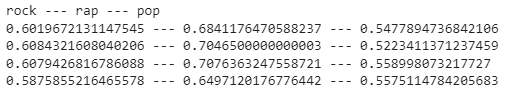

### MTLD

In [ ]:
##Methods

print('rap', '---', 'rock', '---', 'pop')

mtld_df_1985_1994_rock  = lex_df_1985_1994_rock.mtld(
    threshold=0.72
)
mtld_df_1985_1994_rap = lex_df_1985_1994_rap.mtld(
    threshold=0.72
)
mtld_df_1985_1994_pop = lex_df_1985_1994_pop.mtld(
    threshold=0.72
)

print(mtld_df_1985_1994_rap, '---', mtld_df_1985_1994_rock, '---', mtld_df_1985_1994_pop)


mtld_df_1995_2004_rock  = lex_df_1995_2004_rock.mtld(
    threshold=0.72
)
mtld_df_1995_2004_rap = lex_df_1995_2004_rap.mtld(
    threshold=0.72
)
mtld_df_1995_2004_pop = lex_df_1995_2004_pop.mtld(
    threshold=0.72
)

print(mtld_df_1995_2004_rap, '---', mtld_df_1995_2004_rock, '---', mtld_df_1995_2004_pop)

mtld_df_2005_2014_rock  = lex_df_2005_2014_rock.mtld(
    threshold=0.72
)
mtld_df_2005_2014_rap = lex_df_2005_2014_rap.mtld(
    threshold=0.72
)
mtld_df_2005_2014_pop = lex_df_2005_2014_pop.mtld(
    threshold=0.72
)

print(mtld_df_2005_2014_rap, '---', mtld_df_2005_2014_rock, '---', mtld_df_2005_2014_pop)

mtld_df_2015_2023_rock  = lex_df_2015_2023_rock.mtld(
    threshold=0.72
)
mtld_df_2015_2023_rap = lex_df_2015_2023_rap.mtld(
    threshold=0.72
)
mtld_df_2015_2023_pop = lex_df_2015_2023_pop.mtld(
    threshold=0.72
)

print(mtld_df_2015_2023_rap, '---', mtld_df_2015_2023_rock, '---', mtld_df_2015_2023_pop)

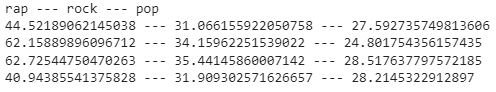

### voc-d

In [ ]:
##Methods

print('rap', '---', 'rock', '---', 'pop')

vocd_df_1985_1994_rock  = lex_df_1985_1994_rock.vocd(
    ntokens=100,  # Maximum number for the token/word size in the random samplings
    within_sample=100,  # Number of samples
    iterations=3,  # Number of times to repeat steps 1 to 3 before averaging
    seed=42  # Seed for reproducibility
)
vocd_df_1985_1994_rap = lex_df_1985_1994_rap.vocd(
    ntokens=100,  # Maximum number for the token/word size in the random samplings
    within_sample=100,  # Number of samples
    iterations=3,  # Number of times to repeat steps 1 to 3 before averaging
    seed=42  # Seed for reproducibility
)
vocd_df_1985_1994_pop = lex_df_1985_1994_pop.vocd(
    ntokens=100,  # Maximum number for the token/word size in the random samplings
    within_sample=100,  # Number of samples
    iterations=3,  # Number of times to repeat steps 1 to 3 before averaging
    seed=42  # Seed for reproducibility
)

print(vocd_df_1985_1994_rap, '---', vocd_df_1985_1994_rock, '---', vocd_df_1985_1994_pop)


vocd_df_1995_2004_rock  = lex_df_1995_2004_rock.vocd(
    ntokens=100,  # Maximum number for the token/word size in the random samplings
    within_sample=100,  # Number of samples
    iterations=3,  # Number of times to repeat steps 1 to 3 before averaging
    seed=42  # Seed for reproducibility
)
vocd_df_1995_2004_rap = lex_df_1995_2004_rap.vocd(
    ntokens=100,  # Maximum number for the token/word size in the random samplings
    within_sample=100,  # Number of samples
    iterations=3,  # Number of times to repeat steps 1 to 3 before averaging
    seed=42  # Seed for reproducibility
)
vocd_df_1995_2004_pop = lex_df_1995_2004_pop.vocd(
    ntokens=100,  # Maximum number for the token/word size in the random samplings
    within_sample=100,  # Number of samples
    iterations=3,  # Number of times to repeat steps 1 to 3 before averaging
    seed=42  # Seed for reproducibility
)

print(vocd_df_1995_2004_rap, '---', vocd_df_1995_2004_rock, '---', vocd_df_1995_2004_pop)

vocd_df_2005_2014_rock  = lex_df_2005_2014_rock.vocd(
    ntokens=100,  # Maximum number for the token/word size in the random samplings
    within_sample=100,  # Number of samples
    iterations=3,  # Number of times to repeat steps 1 to 3 before averaging
    seed=42  # Seed for reproducibility
)
vocd_df_2005_2014_rap = lex_df_2005_2014_rap.vocd(
    ntokens=100,  # Maximum number for the token/word size in the random samplings
    within_sample=100,  # Number of samples
    iterations=3,  # Number of times to repeat steps 1 to 3 before averaging
    seed=42  # Seed for reproducibility
)
vocd_df_2005_2014_pop = lex_df_2005_2014_pop.vocd(
    ntokens=100,  # Maximum number for the token/word size in the random samplings
    within_sample=100,  # Number of samples
    iterations=3,  # Number of times to repeat steps 1 to 3 before averaging
    seed=42  # Seed for reproducibility
)

print(vocd_df_2005_2014_rap, '---', vocd_df_2005_2014_rock, '---', vocd_df_2005_2014_pop)

vocd_df_2015_2023_rock  = lex_df_2015_2023_rock.vocd(
    ntokens=100,  # Maximum number for the token/word size in the random samplings
    within_sample=100,  # Number of samples
    iterations=3,  # Number of times to repeat steps 1 to 3 before averaging
    seed=42  # Seed for reproducibility
)
vocd_df_2015_2023_rap = lex_df_2015_2023_rap.vocd(
    ntokens=100,  # Maximum number for the token/word size in the random samplings
    within_sample=100,  # Number of samples
    iterations=3,  # Number of times to repeat steps 1 to 3 before averaging
    seed=42  # Seed for reproducibility
)
vocd_df_2015_2023_pop = lex_df_2015_2023_pop.vocd(
    ntokens=100,  # Maximum number for the token/word size in the random samplings
    within_sample=100,  # Number of samples
    iterations=3,  # Number of times to repeat steps 1 to 3 before averaging
    seed=42  # Seed for reproducibility
)

print(vocd_df_2015_2023_rap, '---', vocd_df_2015_2023_rock, '---', vocd_df_2015_2023_pop)

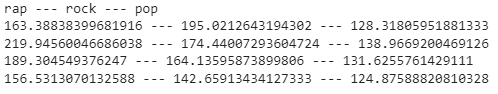

### voc-d визуализация

### Подкорпус текстов поп-музыки

In [ ]:
lex_df_1985_2023_pop.vocd_fig(
    ntokens=200,  # Maximum number for the token/word size in the random samplings
    within_sample=1000,  # Number of samples
    seed=42  # Seed for reproducibility
)

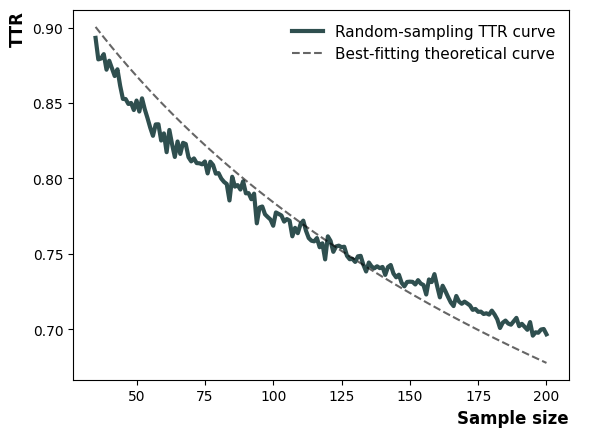

### Подкорпус текстов рока

In [ ]:
lex_df_1985_2023_rock_ns.vocd_fig(
    ntokens=200,  # Maximum number for the token/word size in the random samplings
    within_sample=1000,  # Number of samples
    seed=42  # Seed for reproducibility
)

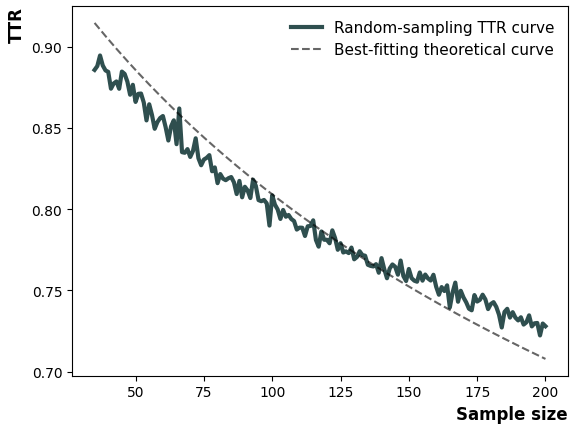

### Подкорпус текстов рэпа

In [ ]:
lex_df_1985_2023_rap_ns.vocd_fig(
    ntokens=200,  # Maximum number for the token/word size in the random samplings
    within_sample=1000,  # Number of samples
    seed=42  # Seed for reproducibility
)

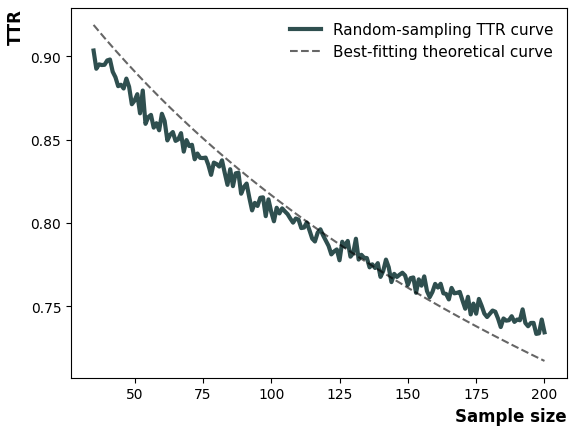